# Section 1

In [126]:
import base64
import string
import sys
from itertools import cycle

ascii_alphabet = string.ascii_lowercase
english_probs = {"a":8.55,"b":1.6,"c":3.16,"d":3.87,"e":12.1,"f":2.18,"g":2.09,"h":4.96,"i":7.33,"j":0.2,"k":0.81,"l":4.21,"m":2.53,"n":7.17,"o":7.47,"p":2.07,"q":0.1,"r":6.33,"s":6.73,"t":8.94,"u":2.68,"v":1.06,"w":1.86,"x":0.19,"y":1.72,"z":0.11}
base64_ciphertext = "KxRIRjMSEgMUFQkIRhIOA0YKBxEfAxRGEQcVRgdGCwcIRgkARgdGFBMBAQMCRgUJEwgSAwgHCAUDRhIOBxJGEQcVRggDEAMURgoPAQ4SAwJGBB9GB0YVCw8KA11GBQkKAkpGFQUHCBIfRgcIAkYDCwQHFBQHFRUDAkYPCEYCDxUFCRMUFQNdRgQHBQ0RBxQCRg8IRhUDCBIPCwMIEl1GCgMHCEpGCgkIAUpGAhMVEh9KRgIUAwcUH0YHCAJGHwMSRhUJCwMOCRFGCgkQBwQKA0g="

'''
    Gets the probs of each english letter on each "plain text"
'''
def get_text_probs(value):
    result = {}
    l = len(value.lower().strip())
    for i in ascii_alphabet:
      if i in value:
        result[i] = value.count(i)/l 
      else:
        result[i] = 0
    return result
    
'''
    Statistical distance formula
    sd = 1/2 * sum(|pr(x) - pr(y)|)
'''
def statistical_distance(text_prob):
    result = 0.0
    for i in ascii_alphabet:
      result += abs(english_probs[i]-text_prob[i])
    return 1/2*result

'''
    XOR function
'''

def crypt(msg , key):
  return bytes(a^b for a, b in zip(msg , cycle(key)))


'''
    Get the stadistical distance and text of each number 
    from 0 to 255 into a dictionary
'''    
def keys_distance(ct,elemts = range(0,256)):
  # distances = {}
  # plainstext = {}
  key = 0
  distances = sys.maxsize
  result  = ""
  for i in elemts:
    xorted_ct = crypt(ct, i.to_bytes(1, 'little'))
    plaintext = xorted_ct.decode('UTF-8', errors='replace')
    text_prob = get_text_probs(plaintext)
    sd = statistical_distance(text_prob)
    # distances[i] = statistical_distance(text_prob)
    # plainstext[i] =  plaintext
    if sd < distances:
      key = i
      distances = sd
      result = plaintext
  return key,result

'''
    Gets the miniumun stadistical distance of all previously calculated
'''    
def min_distance(keys_distances):
  return min(keys_distances, key=keys_distances.get)

def show_result_1():
  ct_decoded = base64.b64decode(base64_ciphertext)
  kd,pt= keys_distance(ct_decoded)
  #key = min_distance(kd)
  print("The recovered plaintext: ", kd)
  print("The decryption key: ", pt)

show_result_1()


The recovered plaintext:  102
The decryption key:  Mr. Utterson the lawyer was a man of a rugged countenance that was never lighted by a smile; cold, scanty and embarrassed in discourse; backward in sentiment; lean, long, dusty, dreary and yet somehow lovable.


# Section 2

Possible Top 3 Key Lengths: [28, 14, 7]


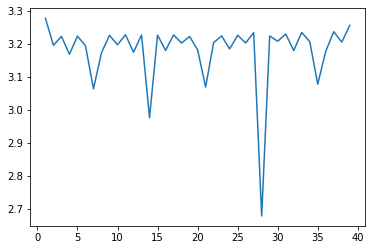

{28: 'AStoryWithoutUjingTheLbtrbrE', 14: 'AilyW~WibotrqS', 7: 'j~otrwS'}

Due to 28 is the most likely key size and some wrong characters we deduce that the key is:  AStoryWithoutUsingTheLetterE


So, as on similar occasions months ago, word that land was again cropping up in Gadsby's mind, brought out a flood of landlords with vacant lots, all looking forward to disposing of a dump worth two dollars and a half, for fifty thousand. Now an airport must occupy a vast lot of land, so cannot stand right in a City's shopping district; but finally a big tract was bought, and right in back of tiny Marian's back yard! Instantly, City Hall was full of applicants for flying Branton Hills' first aircraft. To Gadsby's joy, amongst that bunch was Harold Thompson, an old Organization lad, who was known around town as a chap who could do about anything calling for brains. As an airport is not laid out in a day, Harold got busy with paid aviators and soon was piloting a craft without aid; and not only

In [127]:
import base64
from heapq import nsmallest
import matplotlib.pyplot as plt

ciphertext_2 = "EjxYTxMKdwYaSBwcGTwfCBxHOwsGLRYdGwsBZSw8GhsaCncIEwdDVQM6AQ1OEzwJEWwJFRoBUjIgIFQOFRg+B1QLHRoEJRoHCUchGEUlC1QzBBY2IypTHFIUPgcQRE8XBjoGDgYTdAcQOEUVVAMeKi43VAAUWTsIGgwDGgYxAEkZDiAARToEFxULBmUtPAAcXlk2BRhIAxobPhoHCUcyBxc7BAYQRQYqYTcdHAIWJAAaD08aEnUSSQoSORhFOwoGAA1SMTY8VAsdFTsIBhtPFBoxUwhODzUEA2BFEhsXUiMoNQAWUg0/BgEbDhsQe1MnARB0CQtsBB0GFR03NXMZGgENdwYXCxoFDXUSSRgGJxxFIAoAVAoUZS0yGgteWSQGVAsOGxo6B0kdEzUGAWwXHRMNBmUoPVQOUjo+HQ1PHFUHPRwZHg46D0UoDAcAFxsmNWhUDQcNdw8dBg4ZGCxTCE4FPQ9FOBcVFxFSMiAgVA0dDDABAERPFBoxUxsHADwcRSULVBYEES5hPBJPBhA5EFQlDgcdNB1OHUc2CQYnRQ0VFxZkYRoaHAYYOR0YEUNVNzwHEE4vNQQJbBIVB0UUMC0/VAAUWTYZBAQGFhU7BxpOATsaRSoJDR0LFWUDIRUBBhY5STwBAxkHclMPBxUnHEUtDAYXFxMjNX1UOx1ZEAgQGw0MUyZTAwEeeEgEIQoaExYGZTU7FRtSGyIHFwBPAhUmUyEPFTsEAWwxHBsIAjYuPVhPExd3BhgMTzoGMhIHBx01HAwjC1QYBBZpYSQcAFIONhpUAwEaAztTCBwIIQYBbBEbAwtSJDJzFU8RETYZVB8HGlQ2HBwCA3QMCmwEFhsQBmUgPQ0bGhA5DlQLDhkYPB0OTgE7GkUuFxUdCwFrYRIHTxMXdwgdGh8aBiFTAB1HOgcRbAkVHQFSKjQnVAYcWTZJEAkWWVQdEhsBCzBIAiMRVBYQATxhJB0bGlknCB0MTxQCPBIdARUnSAQiAVQHCh0rYSQVHFIJPgUbHAYbE3USSQ0VNQ4RbBIdAA0dMDVzFQYWQncIGgxPGxshUwYACy1IJz4EGgAKHGUJOhgDAVkxBhgDHFlUNwYdTgg4DEUtEx0VER03Mn9UHBMOdwAaSCcUBjofDUJHNUhHLgwGEEgfJC9xVAAUWTkGVBsCFBg5UwgMDjgBETVLVDULFmUyPFQbGxcuSTkJHRwVO1QaTkUiARYlChpWRQUkMnMVTxQYNB1PSAUAByFTCB1HdgoMK0UTHRceZ2EfAQwLXiRJLgcATlQ0HQ1CRzUbRTsMABxFEyktcxYGFVkUAAARTxQSMxIAHBR4SAQiRT0aBAciNCEVGxsWOUkHAAAAGDFTGhoGJhxFJRFUGwMUa2EdGxheWTgHVAkDGVQmBgoGRzUOAy0MBgdFCyo0cxUDBRguGlQOBhsQdRJJTBE9Gww4CgZUChRlKTwaAABbbEkVBgtVGztTHQYOJ0gCPgQaEEUWJDhzMw4WCjUQVAsAABgxHU4aRyAADCIOVBsDUiQvKhYAFgB3DxsaTwEcNAdJBwokBxc4BBoARQIqMidUDQcNdyQVGgYUGntTKAADeEgEP0UdAEUFKjQ/EE8dGjQcBkgGG1QUBg4bFCBERS0LDVQBEzxhJBsaHh13DRtETxQHdQcBDxN0ARZsBFQHBhoqLj9UGRMaNh0dBwFVGTodHQZJ"


"""
    2.a
"""
def split_text(text, n):
  return [text[i:i + n] for i in range(0, len(text), n)]

def split_bytes(data, n,returnAll=False):
  ct_decoded = base64.b64decode(data)
  chunks = split_text(ct_decoded, n)
  if returnAll:
    return chunks
  
  if len(chunks[0]) != len(chunks[-1]):
    chunks.pop()
  return chunks

"""
    2.b
"""
def hamming_distance(a, b):
  hd = 0
  for b1,b2 in zip(a,b):
    hd += bin(b1^b2).count('1')
  return hd


"""
    2.c
"""
def most_likely_key_length(text):
  hd_scores_map = {}
  for keySize in range (1,40):
    distances = []
    chunks = split_bytes(text,keySize)
    for a in chunks:
      for b in chunks:
        hd_normalized = hamming_distance(a,b) / keySize
        if hd_normalized > 0:
          distances.append(hd_normalized)
    if len(distances) > 0:
      score = sum(distances) / len(distances)
      hd_scores_map[keySize] = score
  return hd_scores_map

def most_top_n(scores_map, n):
  return nsmallest(n, scores_map, key=scores_map.get)



"""
    2.d
"""
def decrypt_key_by_lenght(text, opts):
  results = {}
  for n in opts:
    text_parts = split_bytes(text,n)
    transpose_parts = list(zip(*text_parts))
    keys = []
    for p in transpose_parts:
      kd,pt = keys_distance(p)
      keys.append(kd)
    results[n] = "".join([chr(i) for i in keys])
  return results

def show_result_2(text, top_n):
  scores_map = most_likely_key_length(text)
  possible_keys_length = most_top_n(scores_map, top_n)
  print(f'Possible Top 3 Key Lengths: {possible_keys_length}')
  #[print(f'Key: {k} - Score: {s}') for k,s in possible_keys_length.items()]
  plt.plot(*zip(*scores_map.items()))
  plt.show()
  
  key_posibilities = decrypt_key_by_lenght(text, possible_keys_length)
  print(key_posibilities)
  result_key = "AStoryWithoutUsingTheLetterE"
  print("\nDue to 28 is the most likely key size and some wrong characters we deduce that the key is: ",result_key)

  result_text = crypt(base64.b64decode(ciphertext_2),str.encode(result_key))
  print("\n\n"+result_text.decode('UTF-8', errors='ignore'))



show_result_2(ciphertext_2, top_n=3)


  
 

# Section 3